<a href="https://colab.research.google.com/github/yousef-taheri/Projects/blob/master/HeartDisease/Heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import ElasticNet
from sklearn.svm import LinearSVC
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

In [ ]:
heart_data=pd.read_csv('data/heart.csv',na_values='?')

In [ ]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [ ]:
heart_X=heart_data.drop('target',axis=1)
heart_Y=heart_data['target']

#preporcessing

In [ ]:
#missing values
heart_X1=heart_X.fillna(value={'ca':np.mean(heart_X['ca']),'thal':sp.stats.mode(heart_X['thal'])[0][0]},axis=0)
np.sum(heart_X1.isna())

In [ ]:
#dummy variables
category_variables=['sex','cp','fbs','restecg','slope','exang','thal']
dummyHeartX=pd.get_dummies(heart_X1,columns=category_variables,prefix=category_variables,drop_first=True)

In [ ]:
#standardizing data
scaler = StandardScaler(,)
heart_X2=scaler.fit_transform(dummyHeartX)

#visualization

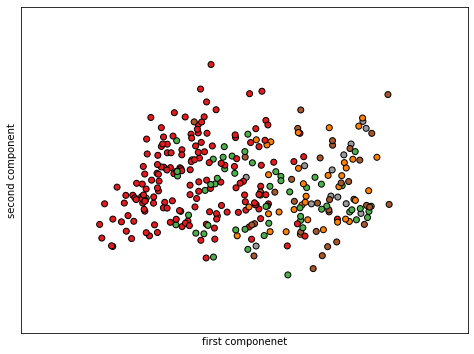

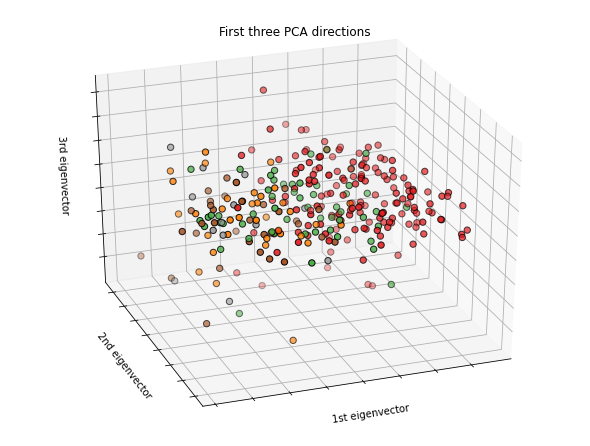

In [ ]:
#dimension reduction and plotting

plt.figure(2, figsize=(8, 6))
plt.clf()

X_reduced = PCA(n_components=2).fit_transform(heart_X2)
r=2
x_min, x_max = X_reduced[:, 0].min() - r, X_reduced[:, 0].max() + r
y_min, y_max = X_reduced[:, 1].min() - r, X_reduced[:, 1].max() + r
# Plot the training points
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=heart_Y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('first componenet')
plt.ylabel('second component')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(heart_X2)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=heart_Y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

#classification

In [ ]:

XGBclf = GradientBoostingClassifier()
XGBclf.fit(heart_X2, heart_Y)
#XGBclf.score(heart_X1, heart_Y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

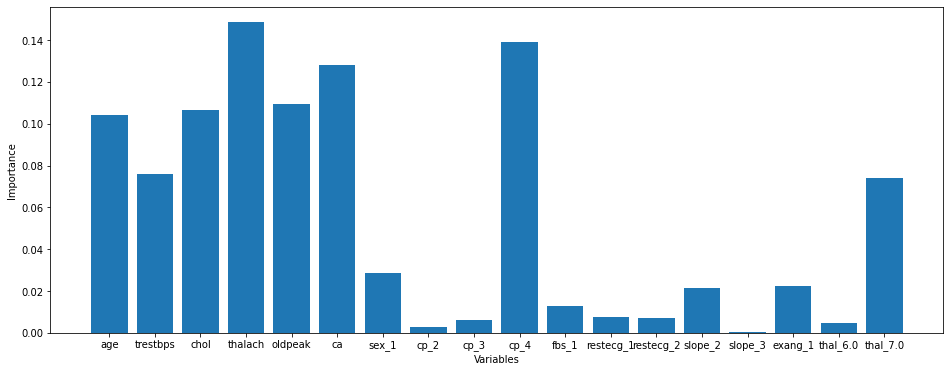

In [ ]:

plt.figure(1, figsize=(16, 6))
plt.bar(dummyHeartX.columns,XGBclf.feature_importances_)
plt.xlabel("Variables")
plt.ylabel("Importance")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
XGBparameters = {
              'n_estimators':[100,150,200],
              'max_depth':[2,3,4]}
XGBclf = GradientBoostingClassifier()
gridClf = GridSearchCV(XGBclf, XGBparameters,n_jobs=-1,cv=6)
gridClf.fit(heart_X2, heart_Y)

GridSearchCV(cv=6, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

##XGBoost

In [ ]:

XGBclf = GradientBoostingClassifier(max_depth= 1,n_estimators= 60)
print(np.mean(cross_val_score(XGBclf,heart_X2, heart_Y, cv=10)))

0.6070967741935483


##Random forest

In [ ]:
RFclf = RandomForestClassifier()#n_estimators=7,criterion='gini')
print(np.mean(cross_val_score(RFclf,heart_X2, heart_Y, cv=10)))

0.5836559139784946


##MLP

In [ ]:
NNclf = MLPClassifier(activation='tanh',batch_size=50,max_iter=2000,hidden_layer_sizes=(20,10))
print(np.mean(cross_val_score(NNclf,heart_X2, heart_Y, cv=10)))

0.5676344086021505


##Lasso Regression

In [ ]:
LassoReg=linear_model.Lasso(alpha=.001)
LassoReg.fit(heart_X2,heart_Y)
print("nb of selected featurs on heart dataset: ",LassoReg.sparse_coef_.getnnz())
print("accuracy ",np.mean(cross_val_score(LassoReg,heart_X2, heart_Y, cv=10)))

nb of selected featurs on heart dataset:  18
accuracy  0.5005724734762709


##linear SVC

In [ ]:
LinSVC=LinearSVC(C=1, penalty="l2", dual=False)
LinSVC.fit(heart_X2,heart_Y)
print("accuracy ",np.mean(cross_val_score(LinSVC,heart_X2, heart_Y, cv=10)))
print("nb of selected featurs on heart dataset: ",np.sum(1-(LinSVC.coef_==0)))


accuracy  0.5940860215053763
nb of selected featurs on heart dataset:  90


##Elastic Net regression

In [ ]:
ElasNet=ElasticNet(alpha=0.01, l1_ratio=0.8)
ElasNet.fit(heart_X2,heart_Y)
print("nb of selected featurs on heart dataset: ",ElasNet.sparse_coef_.getnnz())
print("accuracy ",np.mean(cross_val_score(ElasNet,heart_X2, heart_Y, cv=10)))


nb of selected featurs on heart dataset:  17
accuracy  0.5019929784454896


#clustering

In [ ]:
#plotting the clustering region in 2D
from sklearn.neighbors.classification import KNeighborsClassifier
from sklearn.manifold.t_sne import TSNE
def ClassificationRegion(preds,X,y):
  X_Train_embedded = TSNE(n_components=2).fit_transform(X)
  #print( X_Train_embedded.shape)
  #model = estimator.fit(X,y)
  y_predicted = preds
  y_predicted=np.round(y_predicted)

  # replace the above by your data and model

  # create meshgrid
  resolution = 100 # 100x100 background pixels
  X2d_xmin, X2d_xmax = np.min(X_Train_embedded[:,0]), np.max(X_Train_embedded[:,0])
  X2d_ymin, X2d_ymax = np.min(X_Train_embedded[:,1]), np.max(X_Train_embedded[:,1])
  xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))

  # approximate Voronoi tesselation on resolution x resolution grid using 1-NN
  background_model = KNeighborsClassifier(n_neighbors=1).fit(X_Train_embedded, y_predicted)
  voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
  voronoiBackground = voronoiBackground.reshape((resolution, resolution))

  #plot
  plt.contourf(xx, yy, voronoiBackground)
  plt.scatter(X_Train_embedded[:,0], X_Train_embedded[:,1], c=y+2)
  plt.show()

In [ ]:

nClust=len(np.unique(heart_Y))

##K-means

homogenity score  0.22143989836697073


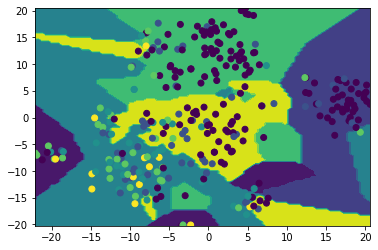

In [ ]:
km = KMeans(n_clusters=nClust, init='k-means++', max_iter=100, n_init=1)
km.fit(heart_X2)
print("homogenity score ",metrics.homogeneity_score(heart_Y,km.labels_))
ClassificationRegion(km.predict(heart_X2),heart_X2,heart_Y)

##spectral clustering

homogenity score 0.20785720881640563


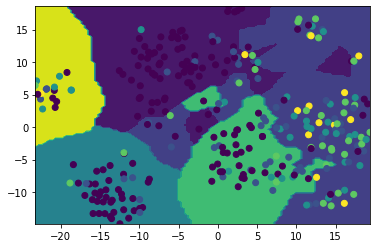

In [ ]:
spectral = SpectralClustering(n_clusters=nClust, eigen_solver='arpack',affinity="nearest_neighbors")
spectral.fit(heart_X2)
print("homogenity score",metrics.homogeneity_score(heart_Y,spectral.labels_))
ClassificationRegion(spectral.labels_,heart_X2,heart_Y)

##Gaussian Mixture

0.17516270365085587


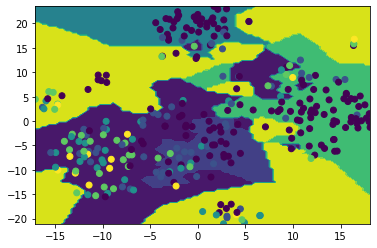

In [ ]:
gmm = GaussianMixture(n_components=nClust,covariance_type='spherical')
gmm.fit(heart_X2)
print(metrics.homogeneity_score(heart_Y,gmm.predict(heart_X2)))
ClassificationRegion(gmm.predict(heart_X2),heart_X2,heart_Y)

##Agglomerative Clustering

In [ ]:
#('ward', 'average', 'complete')
agglo = AgglomerativeClustering(linkage='ward', n_clusters=nClust)
agglo.fit(heart_X2)
metrics.homogeneity_score(heart_Y,agglo.labels_)


0.0969052411836184